<a href="https://colab.research.google.com/github/subrotosingha4/machine_learning_projects/blob/main/Best_School_Prediction_in_US_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project
- **Goal**: is to predict standard score of high schools in New Jersy
- The outcome of this project can be usable for selecting schools for prospective year
- Even it is possible to prototype the idea of niche(https://www.niche.com/k12/rankings/)

## Steps:
- Import the necessary libraries
- Load the real data
- Perform **Qualitative analysis**: remove *noise variable*, check data distribution,primary idea about future data imputation(mean,median,mode,hard-coded impuation)
- Perform **Exploratory data analysis(EDA)**: using Sweetviz and Pandas Profiling-check cardinality,or
- Perform **Quantitative analysis**: any missing value, how many missing value, how many numrical value and categorical values
- **Data preprocessing**: missing value handling
- **Predictive modeling***: use Pycaret to check the best model then train the best model
- **Model evaluateion**: R2, MSE, MAE, RMSE (For  regression)
- **Model testing**: perform the model performance on ***client data**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading Data

In [2]:
df=pd.read_csv('/content/New Jersey -  High Schools.csv')
df.head()

,School,School URL,District,District URL,Address,City,City URL,Zip,County,Phone,Low Grade,High Grade,Is Title I,Is Charter,Is Magnet,Is Virtual,Number Students,Number Full-time Teachers,Student/Teacher Ratio,Percent Free/Disc Lunch,Percent African American,Percent American Indian,Percent Asian,Percent Hispanic,Percent Pacific Islander,Percent Two or More Races,Percent White,Standard Score
0,Academy For Information Technology,https://www.schooldigger.com/go/NJ/schools/180...,Union County Vocational-Technical School District,https://www.schooldigger.com/go/NJ/district/18...,1776 Raritan Road,Scotch Plains,https://www.schooldigger.com/go/NJ/city/Scotch...,7076,Union County,(908) 889-8288,9,12,No,No,(n/a),No,284,14.9,18.9,0.09,0.08,0.0,0.25,0.20,0.01,0.01,0.45,95.5
1,Union County Magnet High School,https://www.schooldigger.com/go/NJ/schools/180...,Union County Vocational-Technical School District,https://www.schooldigger.com/go/NJ/district/18...,1776 Raritan Road,Scotch Plains,https://www.schooldigger.com/go/NJ/city/Scotch...,7076,Union County,(908) 889-8288,9,12,No,No,(n/a),No,303,13.4,22.5,0.11,0.08,0.0,0.35,0.16,0.00,0.01,0.40,95.5
2,Middlesex County Vocational Academy Math Scien...,https://www.schooldigger.com/go/NJ/schools/100...,Middlesex County Vocational and Technical Scho...,https://www.schooldigger.com/go/NJ/district/10...,100 Technology Drive,Edison,https://www.schooldigger.com/go/NJ/city/Edison...,8837,Middlesex County,(732) 452-2600,9,12,No,No,(n/a),No,159,12.0,13.2,0.02,0.01,0.0,0.84,0.06,0.00,0.01,0.09,95.3
3,Academy For Allied Health Sciences,https://www.schooldigger.com/go/NJ/schools/180...,Union County Vocational-Technical School District,https://www.schooldigger.com/go/NJ/district/18...,1776 Raritan Road,Scotch Plains,https://www.schooldigger.com/go/NJ/city/Scotch...,7076,Union County,(908) 889-8288,9,12,No,No,(n/a),No,308,13.6,22.5,0.13,0.13,0.0,0.27,0.22,0.00,0.01,0.36,95.1
4,Academy for Performing Arts,https://www.schooldigger.com/go/NJ/schools/107...,Morris County Vocational School District,https://www.schooldigger.com/go/NJ/district/10...,50 Knoll Drive,Rockaway,https://www.schooldigger.com/go/NJ/city/Rockaw...,7866,Morris County,(973) 664-2201,9,12,No,No,(n/a),No,34,NaN,NaN,0.00,0.03,0.0,0.06,0.09,0.00,0.03,0.79,94.8


- it's always a good idea to make a copy of the data so we dont mess up the original dataset

In [3]:
df1=df.copy()
df1.head()

,School,School URL,District,District URL,Address,City,City URL,Zip,County,Phone,Low Grade,High Grade,Is Title I,Is Charter,Is Magnet,Is Virtual,Number Students,Number Full-time Teachers,Student/Teacher Ratio,Percent Free/Disc Lunch,Percent African American,Percent American Indian,Percent Asian,Percent Hispanic,Percent Pacific Islander,Percent Two or More Races,Percent White,Standard Score
0,Academy For Information Technology,https://www.schooldigger.com/go/NJ/schools/180...,Union County Vocational-Technical School District,https://www.schooldigger.com/go/NJ/district/18...,1776 Raritan Road,Scotch Plains,https://www.schooldigger.com/go/NJ/city/Scotch...,7076,Union County,(908) 889-8288,9,12,No,No,(n/a),No,284,14.9,18.9,0.09,0.08,0.0,0.25,0.20,0.01,0.01,0.45,95.5
1,Union County Magnet High School,https://www.schooldigger.com/go/NJ/schools/180...,Union County Vocational-Technical School District,https://www.schooldigger.com/go/NJ/district/18...,1776 Raritan Road,Scotch Plains,https://www.schooldigger.com/go/NJ/city/Scotch...,7076,Union County,(908) 889-8288,9,12,No,No,(n/a),No,303,13.4,22.5,0.11,0.08,0.0,0.35,0.16,0.00,0.01,0.40,95.5
2,Middlesex County Vocational Academy Math Scien...,https://www.schooldigger.com/go/NJ/schools/100...,Middlesex County Vocational and Technical Scho...,https://www.schooldigger.com/go/NJ/district/10...,100 Technology Drive,Edison,https://www.schooldigger.com/go/NJ/city/Edison...,8837,Middlesex County,(732) 452-2600,9,12,No,No,(n/a),No,159,12.0,13.2,0.02,0.01,0.0,0.84,0.06,0.00,0.01,0.09,95.3
3,Academy For Allied Health Sciences,https://www.schooldigger.com/go/NJ/schools/180...,Union County Vocational-Technical School District,https://www.schooldigger.com/go/NJ/district/18...,1776 Raritan Road,Scotch Plains,https://www.schooldigger.com/go/NJ/city/Scotch...,7076,Union County,(908) 889-8288,9,12,No,No,(n/a),No,308,13.6,22.5,0.13,0.13,0.0,0.27,0.22,0.00,0.01,0.36,95.1
4,Academy for Performing Arts,https://www.schooldigger.com/go/NJ/schools/107...,Morris County Vocational School District,https://www.schooldigger.com/go/NJ/district/10...,50 Knoll Drive,Rockaway,https://www.schooldigger.com/go/NJ/city/Rockaw...,7866,Morris County,(973) 664-2201,9,12,No,No,(n/a),No,34,NaN,NaN,0.00,0.03,0.0,0.06,0.09,0.00,0.03,0.79,94.8


In [4]:
df1.shape

(416, 28)

# Qualitative Data Analysis

In [5]:
df1.describe()

,Zip,High Grade,Number Students,Number Full-time Teachers,Student/Teacher Ratio,Percent Free/Disc Lunch,Percent African American,Percent American Indian,Percent Asian,Percent Hispanic,Percent Pacific Islander,Percent Two or More Races,Percent White,Standard Score
count,416.000000,416.0,416.000000,407.000000,407.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,416.000000
mean,7802.158654,12.0,1026.764423,84.509091,12.482801,0.345494,0.174458,0.000554,0.091855,0.258747,0.001566,0.014506,0.459614,44.177644
std,583.506867,0.0,671.737612,47.459116,5.019926,0.266592,0.216204,0.002291,0.131019,0.225501,0.005955,0.016321,0.304899,24.974358
min,7002.000000,12.0,0.000000,2.100000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000
25%,7278.500000,12.0,548.750000,49.350000,10.800000,0.110000,0.030000,0.000000,0.020000,0.085000,0.000000,0.000000,0.150000,22.450000
50%,7747.000000,12.0,909.000000,77.200000,12.000000,0.290000,0.090000,0.000000,0.040000,0.170000,0.000000,0.010000,0.510000,41.950000
75%,8105.000000,12.0,1324.250000,109.950000,13.200000,0.550000,0.225000,0.000000,0.110000,0.360000,0.000000,0.020000,0.750000,63.375000
max,8904.000000,12.0,5271.000000,344.800000,86.100000,1.000000,0.930000,0.010000,0.840000,0.960000,0.090000,0.100000,0.930000,95.500000


- count reconfirms that there are very few missing data
- mean indicates the average value of the features
- 50% data indicates that most of the data is around the mean thus data is not skewed rather normal
- So numeric values can be imputed usign ***mean/median**. Statistically it has been seen that if data is normally distributed then if you replace the data using mean or median then the prediction won't be impacted much
- minimum and maximum values indicate that there are not lot of outliers

## Check the features names

In [6]:
df1.columns

Index(['School', 'School URL', 'District', 'District URL', 'Address', 'City',
       'City URL', 'Zip', 'County', 'Phone', 'Low Grade', 'High Grade',
       'Is Title I', 'Is Charter', 'Is Magnet', 'Is Virtual',
       'Number Students', 'Number Full-time Teachers', 'Student/Teacher Ratio',
       'Percent Free/Disc Lunch', 'Percent African American',
       'Percent American Indian', 'Percent Asian', 'Percent Hispanic',
       'Percent Pacific Islander', 'Percent Two or More Races',
       'Percent White', 'Standard Score'],
      dtype='object')

## Noise Variable Removals
- the variables that wont affect the predictions such as URL, Address etc.
- we will keep zip since zip is different for different schools and zip may have a role to play while predicting scores

In [7]:
df1=df.drop(columns=['School','School URL','District URL','Address','City URL','Phone'],axis=1)
df1.shape

(416, 22)

# Exploratory data analysis(EDA)

- first we will use pandas profiling for EDA

In [22]:
"""!pip install pandas-profiling --upgrade"""

In [25]:
from pandas_profiling import ProfileReport
df_eda_report=ProfileReport(df1,minimal=True)
df_eda_report.to_file("New Jersey High Schools EDA Report.jpeg")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Simple Overview report shows EDA
- further detail will be presented using seperate power point slides or direct html file may be included for EDA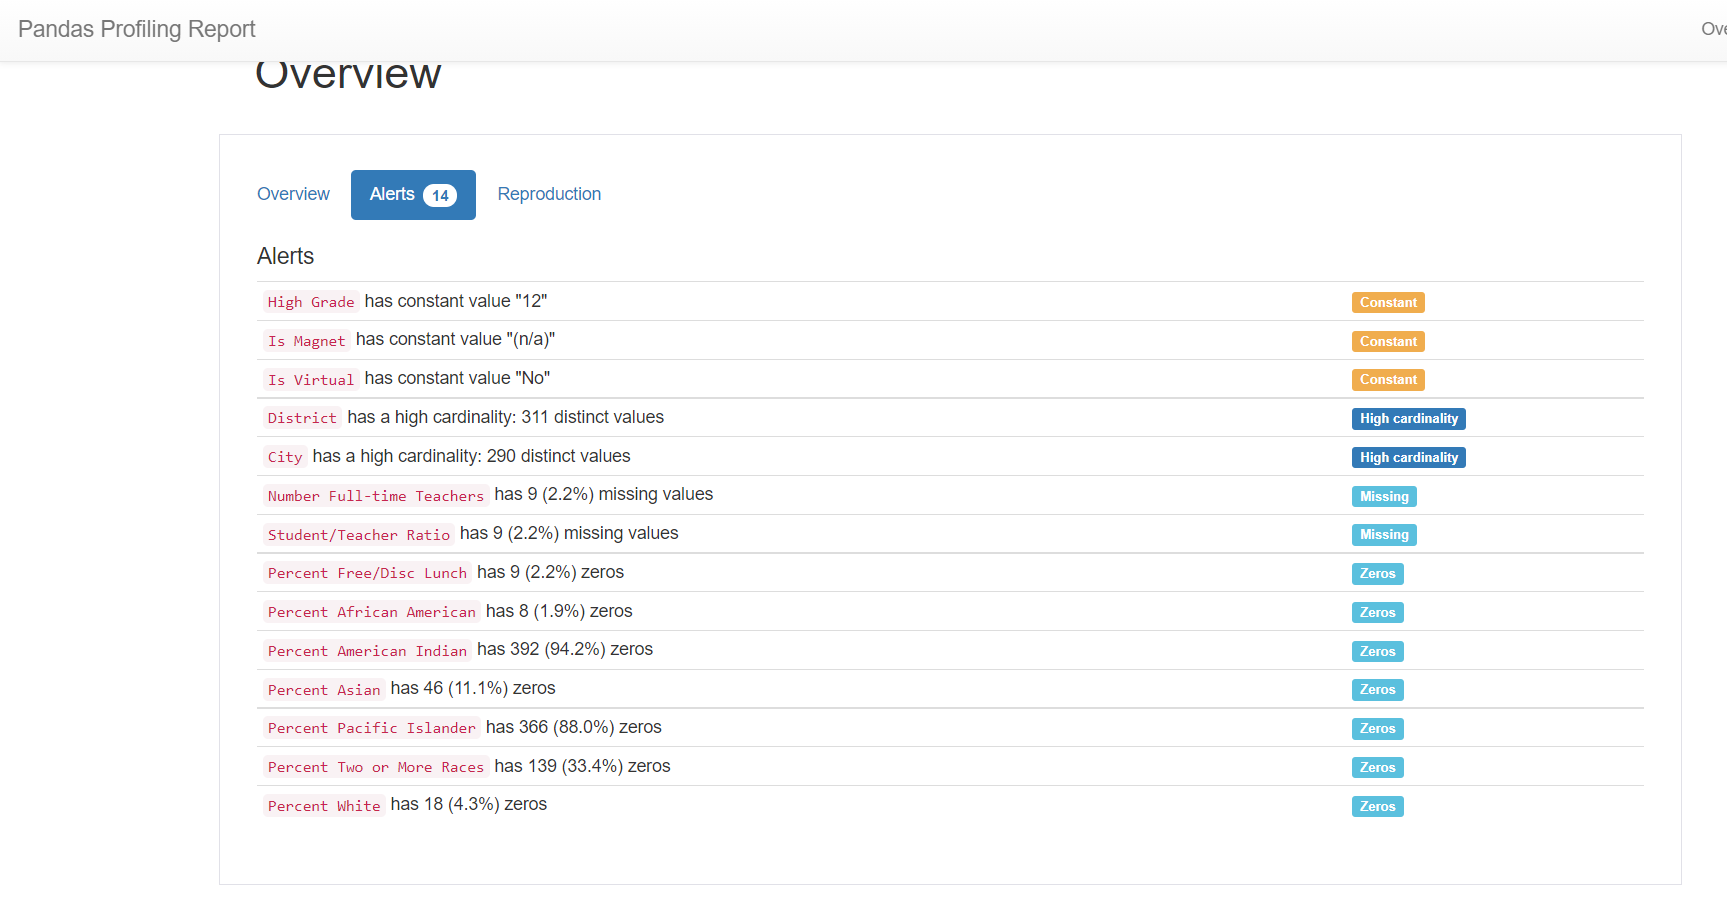

## EDA using sweetviz

In [26]:
"""!pip install sweetviz"""

     |████████████████████████████████| 15.1 MB 191 kB/s 


In [27]:
import sweetviz as sv
sv_report=sv.analyze(df1)
sv_report.show_html("New Jersey High Schools SweetViz Report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report New Jersey High Schools SweetViz Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


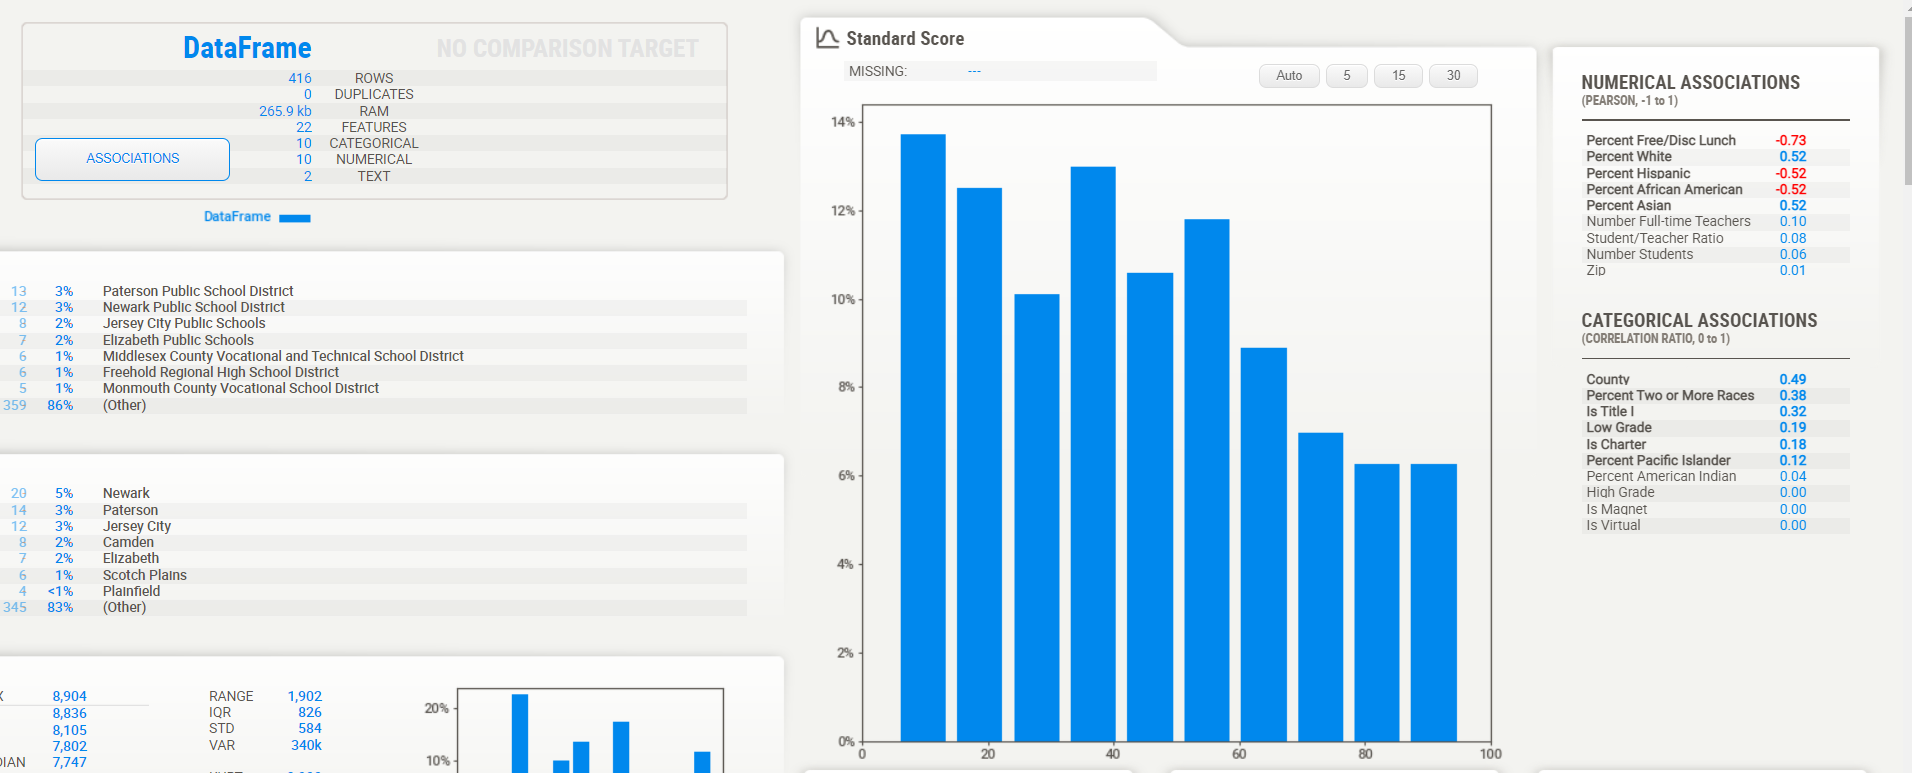

- Correlation between Percent free/disc lunch and Score show that there is a strong negative correlation which means if you provide more free lunch there will be a decrese in score
- we can provide a detail report of EDA using further power point slides of in a seperate notebook

# Quantitative analysis

## Check the missing values

In [8]:
df1.isnull().sum()

District                     0
City                         0
Zip                          0
County                       0
Low Grade                    0
High Grade                   0
Is Title I                   0
Is Charter                   0
Is Magnet                    0
Is Virtual                   0
Number Students              0
Number Full-time Teachers    9
Student/Teacher Ratio        9
Percent Free/Disc Lunch      1
Percent African American     1
Percent American Indian      1
Percent Asian                1
Percent Hispanic             1
Percent Pacific Islander     1
Percent Two or More Races    1
Percent White                1
Standard Score               0
dtype: int64

- the missing values are less than 20%?: yes. 
- So data imputation is feasible
- But very few data is missing thus no need to worry about for this particular dataset

## Check the feature types

In [9]:
df1.dtypes

District                      object
City                          object
Zip                            int64
County                        object
Low Grade                     object
High Grade                     int64
Is Title I                    object
Is Charter                    object
Is Magnet                     object
Is Virtual                    object
Number Students                int64
Number Full-time Teachers    float64
Student/Teacher Ratio        float64
Percent Free/Disc Lunch      float64
Percent African American     float64
Percent American Indian      float64
Percent Asian                float64
Percent Hispanic             float64
Percent Pacific Islander     float64
Percent Two or More Races    float64
Percent White                float64
Standard Score               float64
dtype: object

- mostly are numeric values
- let's seperate the categorical values for future implementation

In [10]:
df1.columns

Index(['District', 'City', 'Zip', 'County', 'Low Grade', 'High Grade',
       'Is Title I', 'Is Charter', 'Is Magnet', 'Is Virtual',
       'Number Students', 'Number Full-time Teachers', 'Student/Teacher Ratio',
       'Percent Free/Disc Lunch', 'Percent African American',
       'Percent American Indian', 'Percent Asian', 'Percent Hispanic',
       'Percent Pacific Islander', 'Percent Two or More Races',
       'Percent White', 'Standard Score'],
      dtype='object')

In [11]:
cat_cols=['District', 
          'City', 
          'Zip', 
          'County', 
          'Low Grade', 
          'High Grade',
          'Is Title I', 
          'Is Charter', 
          'Is Magnet', 
          'Is Virtual']

## Predictive modeling

In [12]:
# Doing Auto ML with PyCaret
"""!pip install pycaret --upgrade"""

'!pip install pycaret --upgrade'

In [13]:
from pycaret.regression import *

In [14]:
regression_model_setup = setup(df1,  target = 'Standard Score', 
                               categorical_features= cat_cols,
                               train_size = 0.7)

,Description,Value
0,session_id,6297
1,Target,Standard Score
2,Original Data,"(416, 22)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(291, 324)"


## Running the multiple algorithms

In [15]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.3050,157.7615,12.3133,0.7275,0.3838,0.3445,0.609
gbr,Gradient Boosting Regressor,9.5942,164.4159,12.5955,0.7149,0.3983,0.3631,0.159
et,Extra Trees Regressor,9.5791,171.5968,12.8106,0.7038,0.4056,0.3689,0.625
lightgbm,Light Gradient Boosting Machine,10.3123,192.7276,13.7413,0.6701,0.4276,0.3848,0.088
ada,AdaBoost Regressor,11.3888,195.6854,13.9054,0.6632,0.4499,0.4757,0.131
br,Bayesian Ridge,11.3012,223.5323,14.8568,0.6142,0.4592,0.4332,0.101
omp,Orthogonal Matching Pursuit,11.9327,251.3194,15.6125,0.5663,0.5316,0.4506,0.020
dt,Decision Tree Regressor,12.0737,278.0188,16.3805,0.5231,0.5081,0.4654,0.024
huber,Huber Regressor,12.7978,306.2467,17.3196,0.4727,0.5159,0.4398,0.093
lasso,Lasso Regression,14.0109,317.0827,17.6936,0.4557,0.5070,0.5433,0.021


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=6297, verbose=0, warm_start=False)

# Creating the model with the best algorithm based on the above results
- 'rf'	: Random Forest Regressor	with highest R2-square value 0.7275	 among all models

In [16]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13.4052,308.0738,17.5520,0.4732,0.4746,0.3881
1,7.4867,83.9143,9.1605,0.8521,0.3223,0.2817
2,8.3832,131.4492,11.4651,0.7609,0.2829,0.2508
3,8.3224,112.1144,10.5884,0.7763,0.2936,0.2507
4,8.0044,107.7632,10.3809,0.8336,0.2901,0.2128
5,9.6886,157.7515,12.5599,0.6740,0.4877,0.4662
6,9.3888,168.6550,12.9867,0.7140,0.3893,0.3572
7,10.6031,177.9010,13.3380,0.6856,0.4486,0.4767
8,10.1161,233.6122,15.2844,0.6325,0.5635,0.5146
9,7.6513,96.3799,9.8173,0.8733,0.2851,0.2462


- got the same mean R2-square value using Random Forest Regressor model which is 0.7275	

# Loading the Client dataset for which predictions to be made


- we used florida's high school data in order to predict their best schools 

In [17]:
pred_data = pd.read_csv('/content/FL High Schools Client Dataset.csv')

# Predicting the values using the best model

In [18]:
predictions = predict_model(model, data = pred_data)

# Converting predictions dataframe to csv


In [19]:
predictions.to_csv("FL School Predictions.csv")

# Prediction result

In [20]:
df2=pd.read_csv('/content/FL School Predictions.csv')
df2.head()

,Unnamed: 0,School,School URL,District,District URL,City,City URL,Zip,County,Phone,Low Grade,High Grade,Is Title I,Is Charter,Is Magnet,Is Virtual,Number Students,Number Full-time Teachers,Student/Teacher Ratio,Percent Free/Disc Lunch,Percent African American,Percent American Indian,Percent Asian,Percent Hispanic,Percent Pacific Islander,Percent Two or More Races,Percent White,Average Standard Score (2018-19),Label
0,0,Atlantic Technical College,https://www.schooldigger.com/go/FL/schools/001...,Broward,https://www.schooldigger.com/go/FL/district/00...,Margate,https://www.schooldigger.com/go/FL/city/Margat...,33063,Broward,(754) 321-5100,9,12,No,No,Yes,No,649,124.0,5.2,66.9,50.1,0.6,5.4,25.7,0.0,4.0,14.2,NaN,57.592001
1,1,Seaside Neighborhood School,https://www.schooldigger.com/go/FL/schools/019...,Walton,https://www.schooldigger.com/go/FL/district/01...,Santa Rosa Beach,https://www.schooldigger.com/go/FL/city/Santa+...,32459,Walton,(850) 231-0396,5,12,No,Yes,No,No,347,24.0,14.4,6.3,1.4,0.3,2.9,3.7,0.6,2.9,88.2,NaN,63.776001
2,2,Terra Environmental Research Institute,https://www.schooldigger.com/go/FL/schools/003...,Miami-Dade,https://www.schooldigger.com/go/FL/district/00...,Miami,https://www.schooldigger.com/go/FL/city/Miami/...,33173,Miami-Dade,(305) 412-5800,9,12,No,No,Yes,No,1783,73.0,24.4,38.5,2.3,0.1,3.0,81.9,0.1,0.7,12.0,NaN,57.604001
3,3,Clark Advanced Learning Center,https://www.schooldigger.com/go/FL/schools/012...,Martin,https://www.schooldigger.com/go/FL/district/01...,Stuart,https://www.schooldigger.com/go/FL/city/Stuart...,34997,Martin,(772) 419-5751,10,12,No,Yes,No,No,249,8.0,31.1,18.1,2.8,0.0,2.8,15.3,0.0,2.0,77.1,NaN,63.677001
4,4,Design & Architecture Senior High,https://www.schooldigger.com/go/FL/schools/003...,Miami-Dade,https://www.schooldigger.com/go/FL/district/00...,Miami,https://www.schooldigger.com/go/FL/city/Miami/...,33137,Miami-Dade,(305) 573-7135,9,12,No,No,Yes,No,503,30.0,16.7,33.0,7.4,0.0,4.0,60.4,0.0,1.6,26.6,NaN,62.127001


In [21]:
df2['Label'].max()

64.7550014781952

- By downloading the client prediction dataset using our predictive model, we got that **Palm Bay Preparatory Academy 6-12** will score highest of 61.64 in next year. Thus, in FL, you recommend the best school will be this school.

# Future Works
- Model will be deployed using as a Web App for production and a feedback loop will be added for model improvement by keeping track of models logs such as loss, latency and other parameters will be added for monitoring.